In [1]:
import pandas as pd
import scanpy as sc
import scProject
import numpy as np
import random

random.seed(613)

# MOUSE RETINA DATA
mousedataset = sc.read('/home/abaraban/conda_env/mouseRetinaData/mouseRetinaDataset.h5ad')
varAdd = pd.read_csv('/home/abaraban/conda_env/mouseRetinaData/10x_Mouse_retina_pData_umap2_CellType_annot.csv')
mousedataset.obs['umap2_CellType'] = varAdd['umap2_CellType'].values
dnorm = np.linalg.norm(mousedataset.X, axis=1, ord=1, keepdims=True)
dnormalized = mousedataset.X / (dnorm * .001)
mousedataset.X = dnormalized
patterns= sc.read('hretinapatterns.csv')

scProject.matcher.orthologMapper(mousedataset, 'gene_map.csv', 'Mouse gene stable ID','Gene stable ID', 'id')
mousedataset_filtered, mousepatterns_filtered = scProject.matcher.filterAnnDatas(mousedataset, patterns.transpose(), 'id')

# HUMAN 
humandataset = sc.read('/home/abaraban/conda_env/humanRetinaData/humanRetinaDataset.h5ad')
dnorm = np.linalg.norm(humandataset.X, axis=1, ord=1, keepdims=True)
dnormalized = humandataset.X / (dnorm * .001)
humandataset.X = dnormalized
patterns= sc.read('hretinapatterns.csv')
humandataset_filtered, humanpatterns_filtered = scProject.matcher.filterAnnDatas(humandataset, patterns.transpose(), 'id')

# Kallman HUMAN 2
Kallmandataset = sc.read('/home/abaraban/conda_env/KallmanData/Kallman.h5ad')
patterns= sc.read('hretinapatterns.csv').transpose()
dnorm = np.linalg.norm(Kallmandataset.X, axis=1, ord=1, keepdims=True)
dnormalized = Kallmandataset.X / (dnorm * .001)
Kallmandataset.X = dnormalized
mapperShortstoID = dict(zip(humandataset.var['gene_short_name'], humandataset.var.index)) # dict to map ensemble to short name
Kallmandataset.var.index = Kallmandataset.var['gene_short_name']
Kallmandataset.var.index = [mapperShortstoID.get(x, x) for x in Kallmandataset.var.index]
overlap = Kallmandataset.var.index.intersection(patterns.var.index)
Kallmandataset_filtered = Kallmandataset[:, overlap]
Kallmanpatterns_filtered = patterns[:, overlap]
norm = np.linalg.norm(Kallmanpatterns_filtered.X, axis=1, ord=1, keepdims=True)
Kallmanpatterns_filtered.X = Kallmanpatterns_filtered.X / (norm*.2)

# Macaque
Macaquedataset = sc.read('/home/abaraban/conda_env/MacaqueData/macaque.h5ad')
patterns= sc.read('hretinapatterns.csv').transpose()
dnorm = np.linalg.norm(Macaquedataset.X, axis=1, ord=1, keepdims=True)
dnormalized = Macaquedataset.X / (dnorm * .001)
Macaquedataset.X = dnormalized
mapperShortstoID = dict(zip(humandataset.var['gene_short_name'], humandataset.var.index))
Macaquedataset.var.index = Macaquedataset.var['gene_short_name']
Macaquedataset.var.index = [mapperShortstoID.get(x,x) for x in Macaquedataset.var.index]
overlap = Macaquedataset.var.index.intersection(patterns.var.index)
Macaquedataset_filtered = Macaquedataset[:, overlap]
Macaquepatterns_filtered = patterns[:, overlap]
norm = np.linalg.norm(Macaquepatterns_filtered.X, axis=1, ord=1, keepdims=True)
Macaquepatterns_filtered.X = Macaquepatterns_filtered.X / (norm*.2)

(107052, 1748) dataset filter shape
(97, 1748) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


(118555, 3113) dataset filter shape
(97, 3113) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


In [2]:
import matplotlib.pyplot as plt
#Mouse Regression
mousedataset_filtered = scProject.matcher.logTransform(mousedataset_filtered)
scProject.rg.NNLR_ElasticNet(mousedataset_filtered, mousepatterns_filtered, 'Mouse', .001, .001, layer='log')

#Human Regression
humandataset_filtered = scProject.matcher.logTransform(humandataset_filtered)
scProject.rg.NNLR_ElasticNet(humandataset_filtered, humanpatterns_filtered, 'Human', .001, .001, layer='log')

#Kallman Regression
Kallmandataset_filtered = scProject.matcher.logTransform(Kallmandataset_filtered)
scProject.rg.NNLR_ElasticNet(Kallmandataset_filtered, Kallmanpatterns_filtered, 'Kallman', .001, .001, layer='log')

#Macaque Regression
Macaquedataset_filtered = scProject.matcher.logTransform(Macaquedataset_filtered)
scProject.rg.NNLR_ElasticNet(Macaquedataset_filtered, Macaquepatterns_filtered, 'Macaque', .001, .001, layer='log', iterations=100000)

plt.rcParams['figure.figsize']= [10, 12]
scProject.viz.pearsonMatrix(humandataset_filtered, humanpatterns_filtered, 'umap2_CellType', len(humandataset_filtered.obs['umap2_CellType'].unique()), 'Human','hpears',True, path='4Species/humanPearson.pdf',display=False, ytickSize=6,xtickSize=10)
scProject.viz.pearsonMatrix(mousedataset_filtered, mousepatterns_filtered, 'umap2_CellType', len(mousedataset_filtered.obs['umap2_CellType'].unique()), 'Mouse','mpears',True, path='4Species/mousePearson.pdf',display=False,ytickSize=6, xtickSize=10)
scProject.viz.pearsonMatrix(Kallmandataset_filtered, Kallmanpatterns_filtered, 'umap2_CellType', len(Kallmandataset_filtered.obs['umap2_CellType'].unique()), 'Kallman','Kpears',True, path='4Species/kallmanPearson.pdf',display=False, ytickSize=6,xtickSize=10)
scProject.viz.pearsonMatrix(Macaquedataset_filtered, Macaquepatterns_filtered, 'umap2_CellType', len(Macaquedataset_filtered.obs['umap2_CellType'].unique()), 'Macaque','Mpears',True, path='4Species/macaquePearson.pdf',display=False,ytickSize=6, xtickSize=10)

A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered
(107052, 97)
A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered
(118555, 97)
A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered
(15155, 97)
A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered
(204000, 97)
['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', 'AC/HC_Precurs', ..., 'Horizontal Cells', 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']
Length: 11
Categories (11, object): ['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', ..., 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']
['Early RPCs' 'Neurogenic Cells' 'Retinal Ganglion Cells'
 'Photoreceptor Precursors' 'Amacrine Cells' 'Bipolar Cells'
 'Horizontal Cells' 'Cones' 'Late RPCs' 'Rods' 'Muller Glia']
['Rods', 'Amacrine Cells', 'C

In [3]:
# Create UMAPs and Feature plots to confirm F75's usage
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(humandataset_filtered, 'umap2_CellType', 'Human', 'HumanUMAP', 20, plot=True, display=False, path='4Species/HumanUMAP.pdf', pointSize=.05)
scProject.viz.UMAP_Projection(mousedataset_filtered, 'umap2_CellType', 'Mouse', 'MouseUMAP', 20, plot=True, display=False, path='4Species/MouseUMAP.pdf', pointSize=.1)
scProject.viz.UMAP_Projection(Kallmandataset_filtered, 'umap2_CellType', 'Kallman', 'KallmanUMAP', 30, plot=True, display=False, path='4Species/KallmanUMAP.pdf', pointSize=.6)
scProject.viz.UMAP_Projection(Macaquedataset_filtered, 'umap2_CellType', 'Macaque', 'MacaqueUMAP', 20, plot=True, display=False, path='4Species/MacaqueUMAP.pdf', pointSize=.01)


# Feature Plots
scProject.viz.featurePlots(mousedataset_filtered, [75], 'Mouse', 'MouseUMAP', pointSize=.05, display=False, path='4Species/MOUSEF', clip=99.9)
scProject.viz.featurePlots(humandataset_filtered, [75], 'Human', 'HumanUMAP', pointSize=.1, display=False, path='4Species/HUMANF', clip=99.9)
scProject.viz.featurePlots(Kallmandataset_filtered, [75], 'Kallman', 'KallmanUMAP', pointSize=.6, display=False, path='4Species/KALLMANF', clip=99.9)
scProject.viz.featurePlots(Macaquedataset_filtered, [75], 'Macaque', 'MacaqueUMAP', pointSize=.01, display=False, path='4Species/MACAQUEF', clip=99.9)

['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', 'AC/HC_Precurs', ..., 'Horizontal Cells', 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']
Length: 11
Categories (11, object): ['RPCs', 'Retinal Ganglion Cells', 'Neurogenic Cells', 'Cones', ..., 'Amacrine Cells', 'Bipolar Cells', 'Rods', 'Muller Glia']
['Early RPCs' 'Neurogenic Cells' 'Retinal Ganglion Cells'
 'Photoreceptor Precursors' 'Amacrine Cells' 'Bipolar Cells'
 'Horizontal Cells' 'Cones' 'Late RPCs' 'Rods' 'Muller Glia']
['Rods', 'Amacrine Cells', 'Cones', 'RPCs', 'Muller Glia', 'Photoreceptor Precursors', 'Bipolar Cells']
Categories (7, object): ['Rods', 'Amacrine Cells', 'Cones', 'RPCs', 'Muller Glia', 'Photoreceptor Precursors', 'Bipolar Cells']
['Bipolar Cells', 'Muller Glia + RPE', 'Amacrine Cells', 'Muller Glia', 'Unknown', 'Cones', 'RGCs', 'Rods']
Categories (8, object): ['Bipolar Cells', 'Muller Glia + RPE', 'Amacrine Cells', 'Muller Glia', 'Unknown', 'Cones', 'RGCs', 'Rods']


/home/abaraban/anaconda3/envs/scProjections/lib/python3.7/site-packages/scProject/viz.py:232: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  colors.set_under(zeroColor)


Number of nonzero cells 54003
Number of nonzero cells 105384
Number of nonzero cells 11373
Number of nonzero cells 103279


In [4]:
# Filter all of the datasets to just overlapping genes to prep for projectionDrivers
mapperShortsToIDs = dict(zip(humandataset.var['gene_short_name'], humandataset.var.index))
overlap = Kallmandataset_filtered.var.index & Macaquedataset_filtered.var.index & humandataset_filtered.var.index & mousedataset_filtered.var.index
# The filtered datasets just overlapping genes
mousefilt = mousedataset_filtered[:, overlap].copy()
humanfilt = humandataset_filtered[:, overlap].copy()
kallmanfilt = Kallmandataset_filtered[:, overlap].copy()
macaquefilt = Macaquedataset_filtered[:, overlap].copy()

mousefilt.var['index'] = mousefilt.var.index
humanfilt.var['index'] = humanfilt.var.index
kallmanfilt.var['index'] = kallmanfilt.var.index
macaquefilt.var['index'] = macaquefilt.var.index
 
# Set up Rods vs. All populations for projectionDrivers
humanAll = [x for x in humandataset_filtered.obs['umap2_CellType'].unique() if not x in ['Rods', 'Cones']]
mouseAll = [x for x in mousedataset_filtered.obs['umap2_CellType'].unique() if not x in ['Rods', 'Cones']]
macaqueAll = [x for x in Macaquedataset_filtered.obs['umap2_CellType'].unique() if not x in ['Rods','Cones']]
kallmanAll = [x for x in Kallmandataset_filtered.obs['umap2_CellType'].unique() if not x in ['Rods', 'Cones']]

mousefiltRod = mousefilt[mousedataset_filtered.obs['umap2_CellType'].isin(['Rods','Cones'])].copy()
mousefiltAll = mousefilt[mousedataset_filtered.obs['umap2_CellType'].isin(mouseAll)].copy()
mousefiltRod.X = np.log2(mousefiltRod.X+1e-30)
mousefiltAll.X = np.log2(mousefiltAll.X+1e-30)

humanfiltRod = humanfilt[humandataset_filtered.obs['umap2_CellType'].isin(['Rods', 'Cones'])].copy()
humanfiltAll = humanfilt[humandataset_filtered.obs['umap2_CellType'].isin(humanAll)].copy()
humanfiltRod.X = np.log2(humanfiltRod.X+1e-30)
humanfiltAll.X = np.log2(humanfiltAll.X+1e-30)

kallmanfiltRod = kallmanfilt[Kallmandataset_filtered.obs['umap2_CellType'].isin(['Rods','Cones'])].copy()
kallmanfiltAll = kallmanfilt[Kallmandataset_filtered.obs['umap2_CellType'].isin(kallmanAll)].copy()
kallmanfiltRod.X = np.log2(kallmanfiltRod.X+1e-30)
kallmanfiltAll.X = np.log2(kallmanfiltAll.X+1e-30)

macaquefiltRod = macaquefilt[Macaquedataset_filtered.obs['umap2_CellType'].isin(['Rods', 'Cones'])].copy()
macaquefiltAll = macaquefilt[Macaquedataset_filtered.obs['umap2_CellType'].isin(macaqueAll)].copy()
macaquefiltRod.X = np.log2(macaquefiltRod.X+1e-30)
macaquefiltAll.X = np.log2(macaquefiltAll.X+1e-30)



In [5]:
# projectionDrivers Rods Cones vs. All
patternfilt = humanpatterns_filtered[:, overlap]
mouse = scProject.stats.projectionDriver(patternfilt, mousefiltRod, mousefiltAll, .99999999999, 'index', 75,display=False)
human = scProject.stats.projectionDriver(patternfilt, humanfiltRod, humanfiltAll, .99999999999, 'index', 75,display=False)
macaque = scProject.stats.projectionDriver(patternfilt, macaquefiltRod, macaquefiltAll, .99999999999, 'index', 75,display=False)
kallman = scProject.stats.projectionDriver(patternfilt, kallmanfiltRod, kallmanfiltAll, .99999999999, 'index', 75,display=False)



C1 is dense
C2 is dense
C1 is dense
C2 is dense
C1 is dense
C2 is dense
C1 is dense
C2 is dense


In [6]:
# union of significant genes for mouse and human
allSigs =  mouse[0].index | human[0].index
# Find CIs in each dataset
mouseSigs = mouse[1].loc[allSigs]
humanSigs = human[1].loc[allSigs]
kallmanSigs = kallman[1].loc[allSigs]
macaqueSigs = macaque[1].loc[allSigs]

# Make one big df
merger=None
merger = mouseSigs.merge(humanSigs, left_index=True, right_index=True).merge(kallmanSigs, left_index=True, right_index=True).merge(macaqueSigs, left_index=True, right_index=True)
merger.columns=['lMouse','hMouse','lHuman', 'hHuman', 'lKallman','hKallman', 'lMacaque','hMacaque']
rank = np.zeros(len(merger))
varRank = np.zeros(len(merger))
for idx, lmouse, hmouse, lhuman, hhuman, lkallman, hkallman, lmacaque, hmacaque in zip(range(537), merger['lMouse'], merger['hMouse'],merger['lHuman'],merger['hHuman'],merger['lKallman'],merger['hKallman'], merger['lMacaque'], merger['hMacaque']):
    score = 0
    variance = []
    if lmouse*hmouse > 0:
        mean = (abs(lmouse)+abs(hmouse))/2
        length = abs(hmouse-lmouse)
        variance.append(mean)
        if length == 0:
            score+=mean
        else:
            score+= mean/length
    if lhuman*hhuman > 0:
        mean = (abs(lhuman)+abs(hhuman))/2
        length = abs(hhuman-lmouse)
        variance.append(mean)
        if length is 0:
            score+=mean
        else:
            score+= mean/length
    if lkallman*hkallman > 0:
        mean = (abs(lkallman)+abs(hkallman))/2
        length = abs(hkallman - lkallman)
        variance.append(mean)
        if length == 0:
            score+=mean
        else:
            score+= mean/length
    if lmacaque*hmacaque > 0:
        mean = (abs(lmacaque)+abs(hmacaque))/2
        length = abs(hmacaque-lmacaque)
        variance.append(mean)
        if length == 0:
            score+=mean
        else:
            score+= mean/length
    rank[idx] = score
    varRank[idx] = np.var(variance)
merger['rank'] = rank
merger['varRank'] = varRank
mapperidtoShorts = dict(zip(humanfilt.var.index, humanfilt.var['gene_short_name']))
merger['gene_short_name'] = [mapperidtoShorts[x] for x in merger.index]





In [7]:
merger.sort_values(by='varRank', ascending=True)
merger['Mouse Log2 FC Weighted'] = (merger['lMouse'] + merger['hMouse'])/2
merger['Human Log2 FC Weighted'] = (merger['lHuman'] + merger['hHuman'])/2
merger['Kallman Log2 FC Weighted'] = (merger['lKallman'] + merger['hKallman'])/2
merger['Macaque Log2 FC Weighted'] = (merger['lMacaque'] + merger['hMacaque'])/2

In [8]:
merger = merger.sort_values(by='varRank', ascending=False)
heatmap = merger[['Mouse Log2 FC Weighted', 'Human Log2 FC Weighted', 'Kallman Log2 FC Weighted','Macaque Log2 FC Weighted']]
heatmap.index = merger['gene_short_name']
# normalize the pattern to visualize the weights
feature = patternfilt[74, :].copy()
# construct weighted Mean Difference using specified feature
curNorm = np.linalg.norm(feature.X, ord=1)
numNonzero = np.count_nonzero(feature.X)
feature.X = feature.X * (numNonzero / curNorm)

heatmap['Latent Space Weight Adj.'] = feature[: , merger.index].X.transpose()
heatmap

/home/abaraban/anaconda3/envs/scProjections/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Mouse Log2 FC Weighted,Human Log2 FC Weighted,Kallman Log2 FC Weighted,Macaque Log2 FC Weighted,Latent Space Weight Adj.
gene_short_name,,,,,
AIPL1,2299.738525,4982.260254,3556.457520,5547.940430,1420.000000
DCT,50.680191,1330.005249,336.231293,-3.395715,993.253479
CRABP2,-1324.293457,1221.375732,663.810852,-75.111801,1169.536621
NEUROD1,994.180237,1137.287598,758.913879,2.645033,368.673187
RCVRN,2761.049561,2937.112549,2082.685547,2999.470215,971.906860
...,...,...,...,...,...
PLA2G4C,-0.010480,1.626431,0.027331,-0.096326,1.651482
HOXB3,-0.000123,-0.001368,-0.005148,0.000329,0.083547
PCNA,-9.780271,1.304161,0.353765,0.841095,13.575830


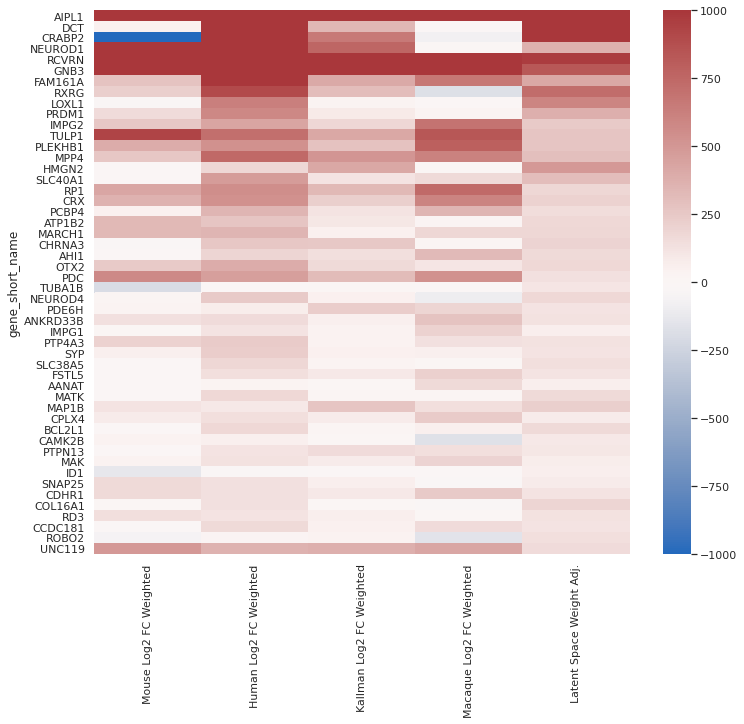

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
figW = sns.heatmap(heatmap.head(50), yticklabels=True, cmap="vlag", center=0, vmax=1000, vmin=-1000)
plt.savefig('4Species/WeightedHeatmap.pdf', bbox_inches='tight')

In [10]:
# union of significant genes for mouse and human
allSigs =  mouse[0].index | human[0].index
# Find CIs in each dataset
mouseSigs = mouse[2].loc[allSigs]
humanSigs = human[2].loc[allSigs]
kallmanSigs = kallman[2].loc[allSigs]
macaqueSigs = macaque[2].loc[allSigs]
mergerBon = mouseSigs.merge(humanSigs, left_index=True, right_index=True).merge(kallmanSigs, left_index=True, right_index=True).merge(macaqueSigs, left_index=True, right_index=True)
mergerBon.columns=['lMouse','hMouse','lHuman', 'hHuman', 'lKallman','hKallman', 'lMacaque','hMacaque']
mergerBon['gene_short_name'] = [mapperidtoShorts[x] for x in mergerBon.index]
mergerBon['Mouse Log2 FC'] = (mergerBon['lMouse'] + mergerBon['hMouse'])/2
mergerBon['Human Log2 FC'] = (mergerBon['lHuman'] + mergerBon['hHuman'])/2
mergerBon['Kallman Log2 FC'] = (mergerBon['lKallman'] + mergerBon['hKallman'])/2
mergerBon['Macaque Log2 FC'] = (mergerBon['lMacaque'] + mergerBon['hMacaque'])/2

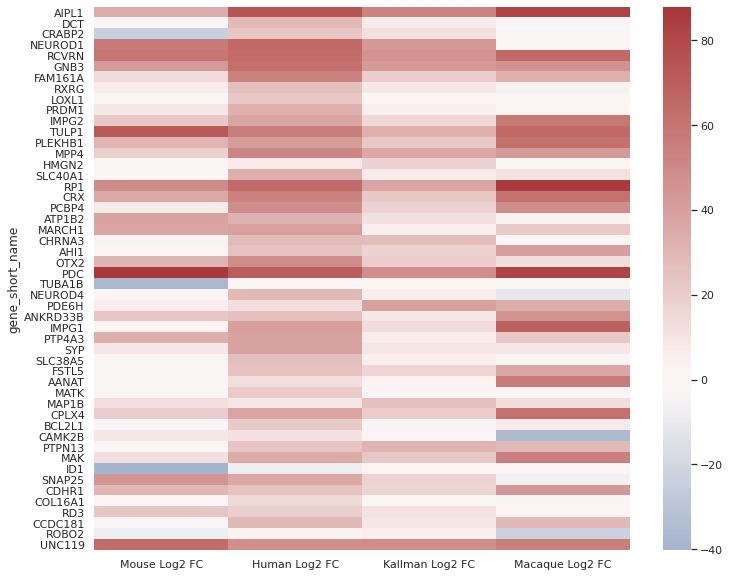

In [11]:
heatmapBon = mergerBon[['Mouse Log2 FC', 'Human Log2 FC', 'Kallman Log2 FC','Macaque Log2 FC']]
heatmapBon.index = mergerBon['gene_short_name']

figBon = sns.heatmap(heatmapBon.loc[heatmap.head(50).index], yticklabels=True, cmap="vlag", center=0)
plt.savefig('4Species/BonHeatmap.pdf', bbox_inches='tight')

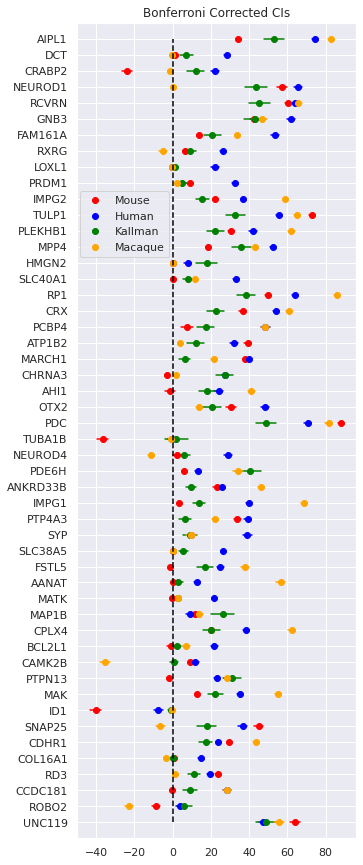

In [12]:
mergerBon.index = mergerBon['gene_short_name']
BCI = mergerBon.loc[heatmap.head(50).index]
zipper = zip(list(BCI.index), BCI['lMouse'], BCI['hMouse'],BCI['lHuman'],
    BCI['hHuman'], BCI['lKallman'], BCI['hKallman'], BCI['lMacaque'], BCI['hMacaque'])
plt.rcParams['figure.figsize']= [5, 15]
counter = len(BCI)-1
genes = []
for geneName, lMouse, hMouse, lHuman, hHuman, lKallman, hKallman, lMacaque, hMacaque in zipper:
    genes.insert(0, geneName)      
    plt.plot((lMouse, hMouse), (counter, counter), '-', color='red')
    plt.plot((lHuman, hHuman), (counter, counter), '-', color='blue')
    plt.plot((lKallman, hKallman), (counter, counter), '-', color='green')
    plt.plot((lMacaque, hMacaque), (counter, counter), '-', color='orange')
    if counter is 0:
        plt.plot((float(lMouse+hMouse)/2.0), counter,'o', color='red', label='Mouse')
        plt.plot((float(lHuman+hHuman)/2.0), counter,'o', color='blue', label='Human')
        plt.plot((float(lKallman+hKallman)/2.0), counter,'o', color='green', label ='Kallman')
        plt.plot((float(lMacaque+hMacaque)/2.0), counter,'o', color='orange', label='Macaque')
    else:
        plt.plot((float(lMouse+hMouse)/2.0), counter,'o', color='red')
        plt.plot((float(lHuman+hHuman)/2.0), counter,'o', color='blue')
        plt.plot((float(lKallman+hKallman)/2.0), counter,'o', color='green')
        plt.plot((float(lMacaque+hMacaque)/2.0), counter,'o', color='orange')
    counter-=1
plt.title("Bonferroni Corrected CIs")
plt.plot((0,0), (0,len(BCI)-1), '--', color='black')
plt.ylim(top= len(BCI))
plt.ylim(bottom=-1)
plt.legend(bbox_to_anchor=(.35, .8))
plt.yticks(range(len(genes)), genes)
plt.savefig('4Species/BonferroniCIs.pdf', dpi=300,bbox_inches='tight')
plt.show()

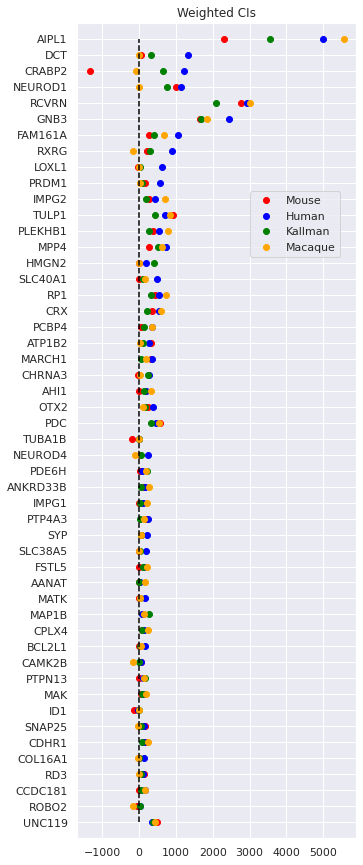

In [13]:
merger.index = merger['gene_short_name']
WCI = merger.loc[heatmap.head(50).index]
zipperW = zip(list(WCI.index), WCI['lMouse'], WCI['hMouse'],WCI['lHuman'],
    WCI['hHuman'], WCI['lKallman'], WCI['hKallman'], WCI['lMacaque'], WCI['hMacaque'])
plt.rcParams['figure.figsize']= [5, 15]
counter = len(WCI)-1
genes = []
for geneName, lMouse, hMouse, lHuman, hHuman, lKallman, hKallman, lMacaque, hMacaque in zipperW:
    genes.insert(0, geneName)      
    plt.plot((lMouse, hMouse), (counter, counter), '-', color='red')
    plt.plot((lHuman, hHuman), (counter, counter), '-', color='blue')
    plt.plot((lKallman, hKallman), (counter, counter), '-', color='green')
    plt.plot((lMacaque, hMacaque), (counter, counter), '-', color='orange')
    if counter is 0:
        plt.plot((float(lMouse+hMouse)/2.0), counter,'o', color='red', label='Mouse')
        plt.plot((float(lHuman+hHuman)/2.0), counter,'o', color='blue', label='Human')
        plt.plot((float(lKallman+hKallman)/2.0), counter,'o', color='green', label ='Kallman')
        plt.plot((float(lMacaque+hMacaque)/2.0), counter,'o', color='orange', label='Macaque')
    else:
        plt.plot((float(lMouse+hMouse)/2.0), counter,'o', color='red')
        plt.plot((float(lHuman+hHuman)/2.0), counter,'o', color='blue')
        plt.plot((float(lKallman+hKallman)/2.0), counter,'o', color='green')
        plt.plot((float(lMacaque+hMacaque)/2.0), counter,'o', color='orange')
    counter-=1
plt.title("Weighted CIs")
plt.plot((0,0), (0,len(WCI)-1), '--', color='black')
plt.ylim(top= len(WCI))
plt.ylim(bottom=-1)
plt.legend(bbox_to_anchor=(.6, .8))
plt.yticks(range(len(genes)), genes)
plt.savefig('4Species/WeightedCIs.pdf', dpi=300,bbox_inches='tight')
plt.show()